In [3]:
# http://jakevdp.github.io/blog/2014/03/11/frequentism-
# and-bayesianism-a-practical-intro/

# Generating simple photon count data
import numpy as np
from scipy import stats

In [4]:
np.random.seed(1)
trueFlux = 1000
N = 50 # number of measurements
F = stats.poisson(trueFlux).rvs(N)  # N measurements of flux
e = np.sqrt(F) # errors on Poisson counts estimated with sqrt
[F, e]

[array([ 992,  962,  968,  991,  993,  970,  992,  961,  983, 1042,  947,
         966,  951, 1079, 1018, 1017,  979,  953, 1050,  980,  971,  999,
        1007, 1008,  953, 1018,  928, 1015, 1067, 1049,  961,  991, 1058,
        1024, 1044, 1024,  978,  993, 1015,  956,  995,  992, 1049,  984,
        1044, 1050,  966, 1060,  939, 1020]),
 array([ 31.4960315 ,  31.01612484,  31.11269837,  31.48015248,
         31.51190251,  31.144823  ,  31.4960315 ,  31.        ,
         31.35283081,  32.28002478,  30.77336511,  31.08054054,
         30.83828789,  32.84813541,  31.90611227,  31.89043744,
         31.28897569,  30.87069808,  32.40370349,  31.30495168,
         31.1608729 ,  31.60696126,  31.73326331,  31.74901573,
         30.87069808,  31.90611227,  30.46309242,  31.85906464,
         32.66496594,  32.38826948,  31.        ,  31.48015248,
         32.52691193,  32.        ,  32.31098884,  32.        ,
         31.27299154,  31.51190251,  31.85906464,  30.91924967,
         31.543620

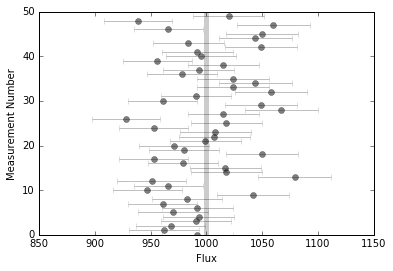

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_axis_bgcolor('white') # already the default
plt.gcf().set_facecolor('white') # axes bg color 
ax.errorbar(F, np.arange(N), xerr=e, fmt='ok', 
            ecolor='gray', alpha=0.5)
ax.vlines([trueFlux], 0, N, linewidth=5, alpha=0.2)
ax.set_xlabel("Flux")
ax.set_ylabel("Measurement Number")

In [5]:
# Given our measurements and errors what is the best
# estimate of the true flux?

In [5]:
# FREQUENTIST APPROACH TO PHOTON COUNTS

In [8]:
# value of trueFlux such that likelihood is maximized
# results in wi = 1/ei^2
w = 1. / e**2
print(""" 
      F_true = {0}
      F_est = {1:.0f} +/- {2:.0f} (based on {3} measurements)
      """.format(trueFlux, (w * F).sum() / w.sum(), 
                 w.sum()**-0.5, N)  )
# w.sum()**(-0.5) # this is the stdeviation.

 
      F_true = 1000
      F_est = 998 +/- 4 (based on 50 measurements)
      


In [9]:
# Conclusion: for 50 measurements of the flux our estimate
# F_est is around 998 and has error (stdev) of 0.4%.

In [ ]:
## BAYESIAN APPROACH TO PHOTON COUNTS

In [11]:
def logPrior(theta): 
    return 1 # flat prior 

def logLikelihood(theta, F, e): 
    return -0.5 * np.sum(np.log(2 * np.pi * e ** 2)
                        + (F - theta[0]) ** 2 / e ** 2)
    
def logPosterior(theta, F, e):
    return logPrior(theta) + logLikelihood(theta, F, e)

In [15]:
## generating some random starting guesses
ndim = 1 # num parameters in model 
nwalkers = 50 # number of MCMC walkers
nburn = 1000 # burn in period to let chains stabilize
nsteps = 2000 # number of MCMC steps to take


# start at random locations between 0 and 20
startingGuesses = 2000 * np.random.rand(nwalkers, ndim)

import emcee 
sampler = emcee.EnsembleSampler(nwalkers, ndim, logPosterior,
                                args = [F, e])
sampler.run_mcm(startingGuesses, nsteps)

sample = sampler.chain # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].ravel() # discard burn-
# in points

ImportError: No module named 'emcee'